<a href="https://colab.research.google.com/github/sgathai/dsc-data-serialization-lab/blob/master/dspt_phase_1_APIs_and_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APIs and SQL

**Lecture Overview**

1. API Fundamentals
2. Must-know SQL Queries


# API Fundamentals

![link text](https://www.cleveroad.com/images/article-previews/40ca78a7a9db7adfb6bb861fc6b8910ae2ef4bb79f5508007d166f01df5c1038.png)

In [ ]:
#@title
# An API (Application Programming Interface) is a set of rules and protocols for building
# and interacting with software. It defines how different software components should
# interact with each other and how data should be exchanged between them.

Example is:

Twitter API: The Twitter API allows developers to access data from Twitter, including tweets, user information, and trending topics.

[Twitter API](https://developer.twitter.com/en/docs/twitter-api)

What is an endpoint?

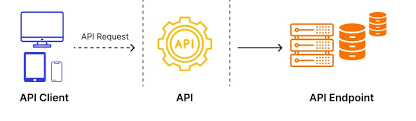

In [ ]:
# An endpoint is a specific location within a web service that an application can 
# access to retrieve or update data. Endpoints typically have a specific URL, such
# as https://example.com/api/users which is used to access a list of users.

**What is REST?**

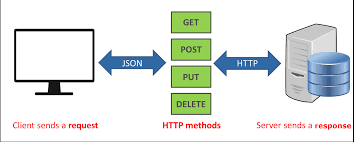

In [ ]:
# REST (Representational State Transfer) is an architectural style for building web services. 
# RESTful APIs use HTTP requests to POST (create), PUT (update), GET (read), and DELETE data.

An example of API request:

```
GET https://api.example.com/users/123
```

This request is sent to the API's endpoint https://api.example.com/users/123 using the GET method to retrieve information about a user with the ID of 123. The API would respond with a JSON object containing the user's information.



```
{
   "userId": 123,
   "username": "johndoe",
   "email": "johndoe@example.com"
}

```




# Must-know SQL Queries

Before we start, we have to load a database to our notebook environment:


In [ ]:
# To connect to our database
# We will first load the sql extension into our environment
%load_ext sql

# Then connect to our in memory sqlite database
# NB: This database will cease to exist as soon as the database connection is closed. 
%sql sqlite://

In [ ]:
# To import our Data from CSV files
# We first import the pandas library
# We will use a function read_csv from pandas to read our datasets as shown
import pandas as pd 

## Data definition language (DDL)

![#000000](https://placehold.co/15x15/000000/000000.png) This includes commands for creating, modifying, and deleting database structures such as tables and views.

Examples of DDL commands include `CREATE TABLE`, `ALTER TABLE`, and `DROP TABLE`.

In [ ]:
# Examples
%%sql
CREATE TABLE Employee (
    EmployeeID INT PRIMARY KEY,
    FirstName VARCHAR(50) NOT NULL,
    LastName VARCHAR(50) NOT NULL,
    Salary DECIMAL(10,2)
);

 * sqlite://
Done.


[]

In [ ]:
%%sql
CREATE TABLE Employee2 (
    EmployeeID INT PRIMARY KEY,
    FirstName VARCHAR(50) NOT NULL,
    LastName VARCHAR(50) NOT NULL,
    Salary DECIMAL(10,2)
);

 * sqlite://
Done.


[]

In [ ]:
%%sql
ALTER TABLE Employee
ADD Age INT;

ALTER TABLE Employee
ADD Address VARCHAR(100);

ALTER TABLE Employee
MODIFY Salary DECIMAL(12,2);

 * sqlite://
Done.
Done.
(sqlite3.OperationalError) near "MODIFY": syntax error
[SQL: ALTER TABLE Employee
MODIFY Salary DECIMAL(12,2);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


For our modify error:

`sqlite3.OperationalError) near "MODIFY": syntax error
[SQL: ALTER TABLE Employee
MODIFY Salary DECIMAL(12,2);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)`

he error you're encountering is due to the use of the MODIFY keyword, which is not supported in SQLite. SQLite has its own syntax for altering columns in a table.

In SQLite, you cannot directly modify an existing column's data type or other attributes. Instead, you need to perform a series of steps to achieve the desired result:

-- Step 1: Rename the existing table  
`ALTER TABLE Employee RENAME TO Employee_old;`

-- Step 2: Create a new table with the modified column structure  
`CREATE TABLE Employee (
    -- Add all the columns from the original table
    -- Replace the Salary column definition with the new data type
    Salary DECIMAL(12,2)
    -- Add other columns here as in the original table structure
);`

-- Step 3: Copy the data from the old table to the new table  
`INSERT INTO Employee SELECT * FROM Employee_old;`

-- Step 4: Drop the old table  
`DROP TABLE Employee_old;`

In [ ]:
%%sql
DROP TABLE Employee;

 * sqlite://
Done.


[]

## Data manipulation language (DML)

![#000000](https://placehold.co/15x15/000000/000000.png) This includes commands for inserting, updating, and deleting data in a database. 

Examples of DML commands include `SELECT`, `INSERT`, `UPDATE`, and `DELETE`.

In [ ]:
%%sql
INSERT INTO Employee (FirstName, LastName, Salary)
VALUES ('John', 'Doe', 60000);

 * sqlite://
1 rows affected.


[]

In [ ]:
%%sql
SELECT FirstName, LastName, Salary
FROM Employee
WHERE Salary > 50000;

 * sqlite://
Done.


FirstName,LastName,Salary
John,Doe,60000


In [ ]:
%%sql
UPDATE Employee
SET Salary = 65000
WHERE EmployeeID = 1;

In [ ]:
%%sql
DELETE FROM Employee
WHERE EmployeeID = 1;

## Joins
![#000000](https://placehold.co/15x15/000000/000000.png) This allows you to retrieve data from multiple tables in a single query. 

There are different types of joins like inner join, outer join, left join and right join.

![link text](https://felixgrayson.files.wordpress.com/2015/06/qje6o.png)

In [ ]:
%%sql
SELECT * FROM Employee A INNER JOIN Employee2 B ON A.EmployeeID=B.EmployeeID; 

 * sqlite://
Done.


EmployeeID,FirstName,LastName,Salary,EmployeeID_1,FirstName_1,LastName_1,Salary_1


## Subqueries

![#000000](https://placehold.co/15x15/000000/000000.png) This allows you to use the result of one query as input for another query.

In [ ]:
# Retrieve all employees who work in the department with the highest average salary
%%sql
SELECT * 
FROM Employee 
WHERE DepartmentID = (SELECT DepartmentID FROM Department WHERE AVG(Salary) = (SELECT MAX(AVG(Salary)) FROM Department));

## Aggregate functions: 

![#000000](https://placehold.co/15x15/000000/000000.png)These are functions like SUM, AVG, COUNT, MIN, MAX etc. that are used to summarize data in a query.

In [ ]:
# Count
%%sql
SELECT COUNT(*) FROM Employee;

%%sql
SELECT COUNT(Salary) FROM Employee WHERE Salary > 50000;

In [ ]:
# Sum
%%sql
SELECT SUM(Salary) FROM Employee;

In [ ]:
# Avg
%%sql
SELECT AVG(Salary) FROM Employee;

In [ ]:
# Min/Max
%%sql
SELECT MIN(Salary) FROM Employee;

In [ ]:
# Group By
%%sql
SELECT Department, COUNT(EmployeeID) FROM Employee GROUP BY Department;

SQL Practice: https://colab.research.google.com/drive/1TXdg1Gb4nFxGk6-T35FU8DyqtfOqJXDY?usp=sharing